In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
bike_data_raw = pd.read_csv('daily-bike-share.csv', parse_dates=['dteday'])

In [6]:
bike_data_raw.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488


In [7]:
bike_data_raw.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [8]:
bike_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB


In [9]:
bike_data_raw['rentals'].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: rentals, dtype: float64

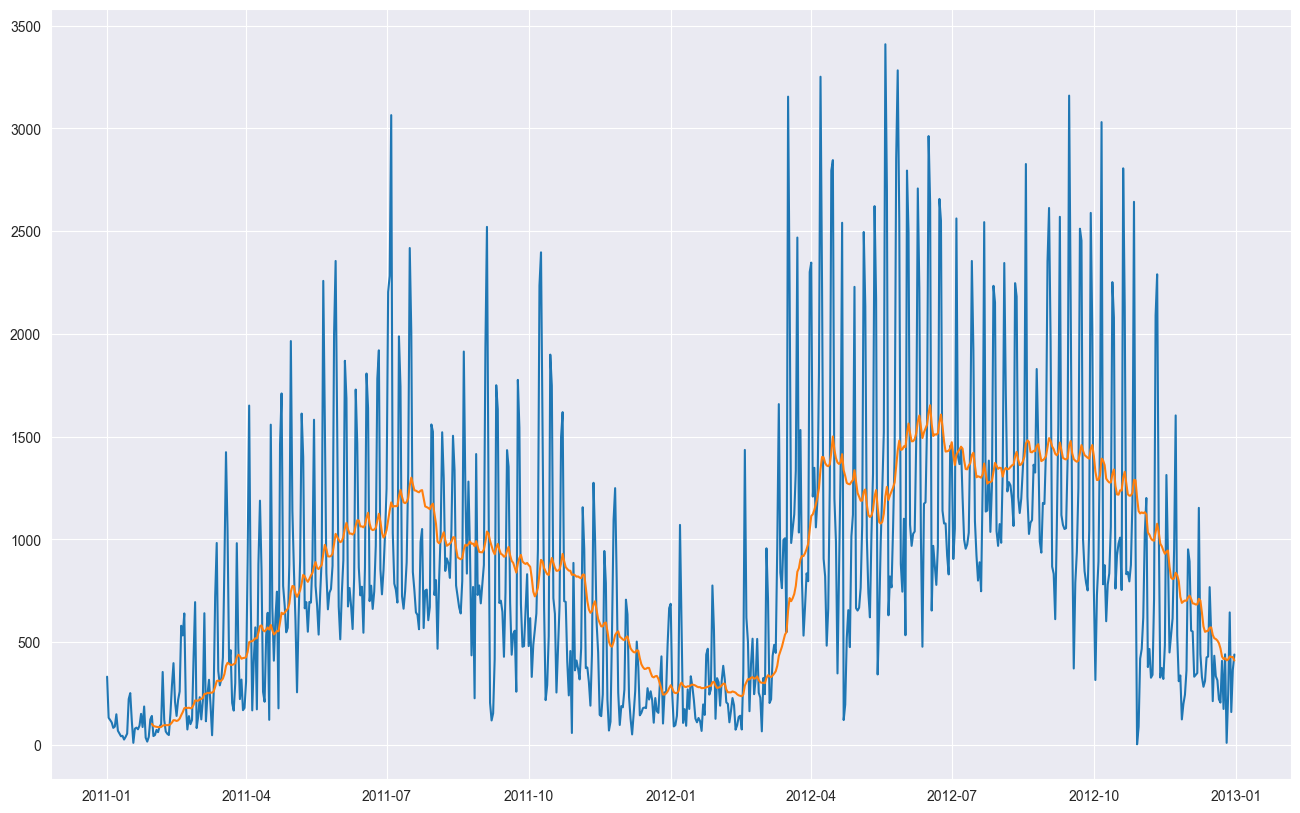

In [23]:
plt.figure(figsize=(16,10))
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'])
plt.plot(bike_data_raw['dteday'], bike_data_raw['rentals'].rolling(window=30).mean())
plt.show()

In [28]:
bike_data = bike_data_raw.copy()
bike_data.drop(['dteday', 'yr', 'instant'], axis=1, inplace=True)


In [29]:
bike_data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [32]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
category_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target = 'rentals'

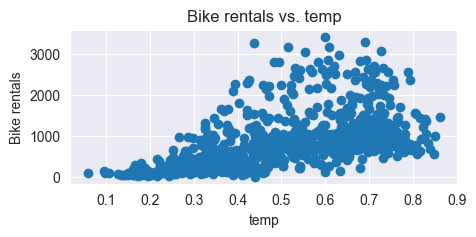

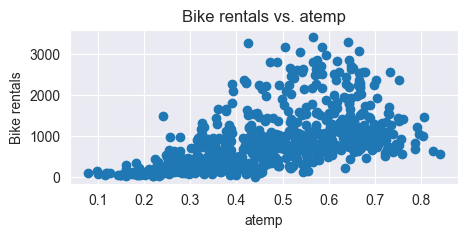

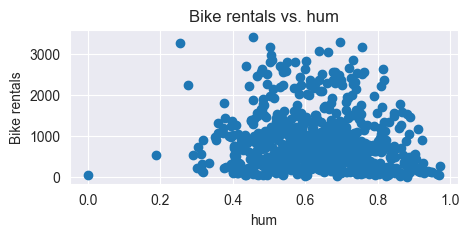

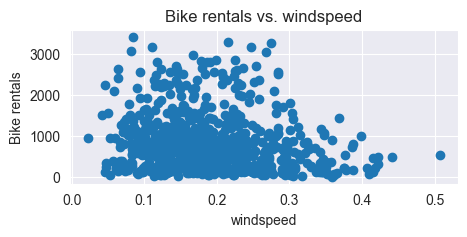

In [33]:
for numeric_feature in numeric_features:
    fig = plt.figure(figsize=(5, 2))
    plt.scatter(bike_data[numeric_feature], bike_data[target])
    plt.xlabel(numeric_feature)
    plt.ylabel('Bike rentals')
    plt.title(f'Bike rentals vs. {numeric_feature}')
    plt.show()


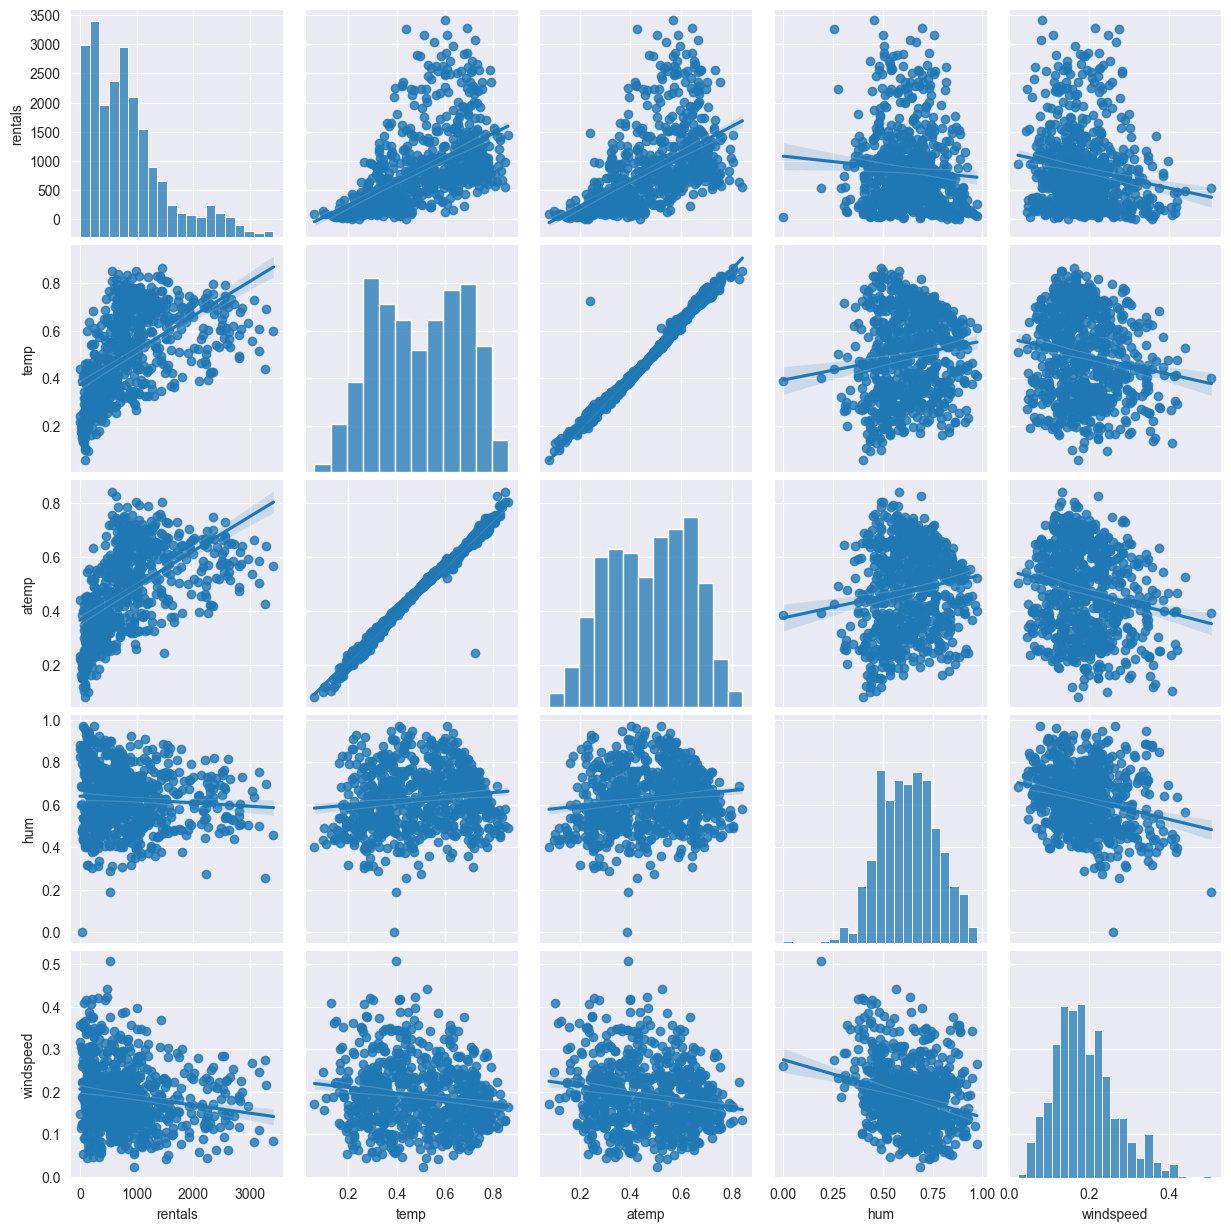

In [39]:
import seaborn as sns
fig = sns.pairplot(bike_data[[target] + numeric_features], kind='reg')
plt.show()

In [ ]:
bike_data['diff_temp'] = (bike_data['atemp'] - bike_data['temp']) / bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'diff_temp', 'hum', 'windspeed']

In [48]:
numeric_features = ['temp', 'diff_temp', 'hum', 'windspeed']

In [49]:
bike_data[[target] + numeric_features].corr()

,rentals,temp,diff_temp,hum,windspeed
rentals,1.000000,0.543285,-0.310423,-0.077008,-0.167613
temp,0.543285,1.000000,-0.599254,0.126963,-0.157944
diff_temp,-0.310423,-0.599254,1.000000,0.000444,-0.233959
hum,-0.077008,0.126963,0.000444,1.000000,-0.248489
windspeed,-0.167613,-0.157944,-0.233959,-0.248489,1.000000


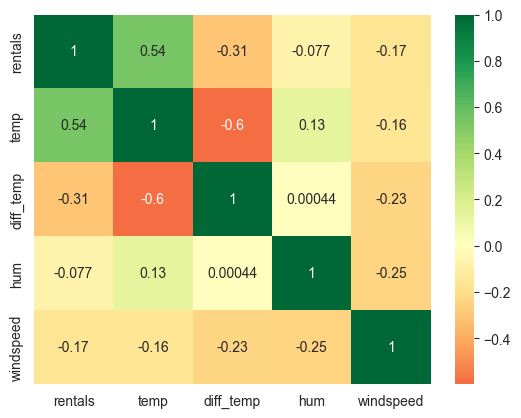

In [52]:
fig = sns.heatmap(bike_data[[target] + numeric_features].corr(),
                  annot=True,
                  cmap='RdYlGn',
                  center=0)

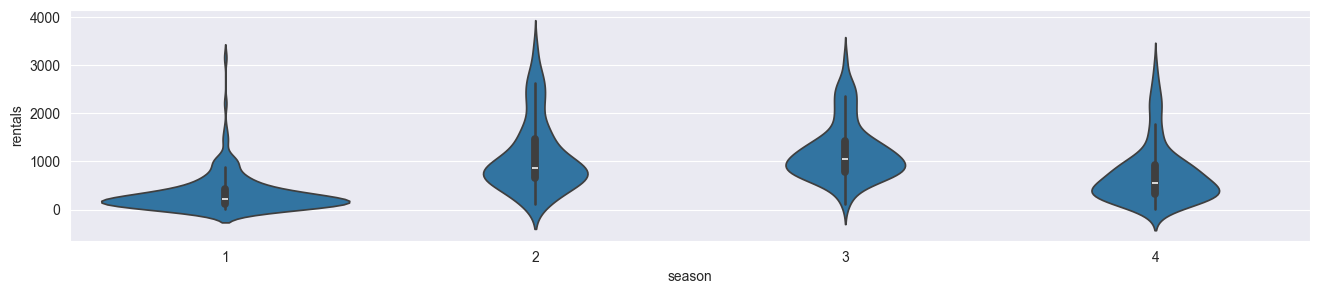

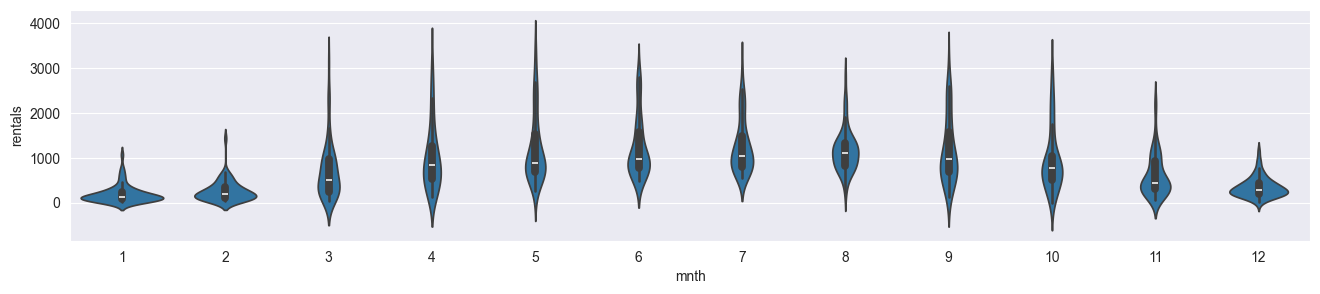

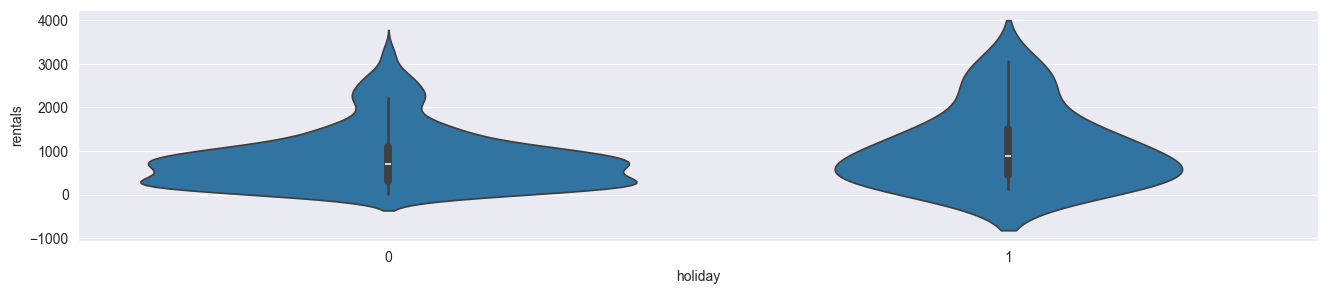

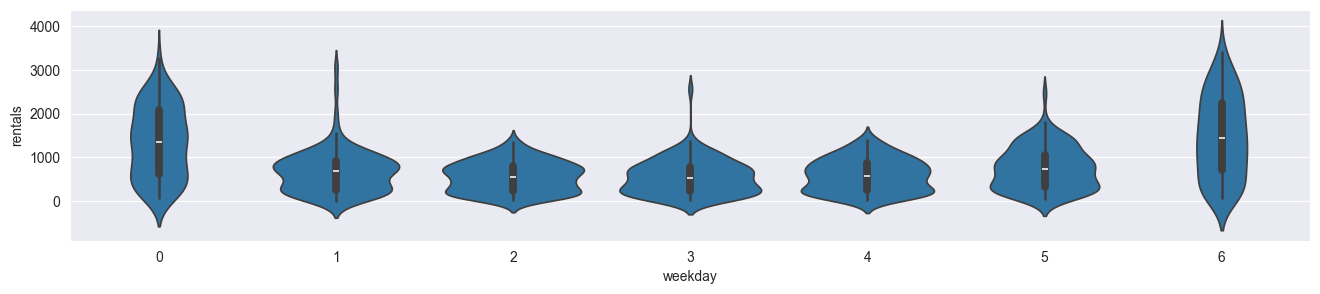

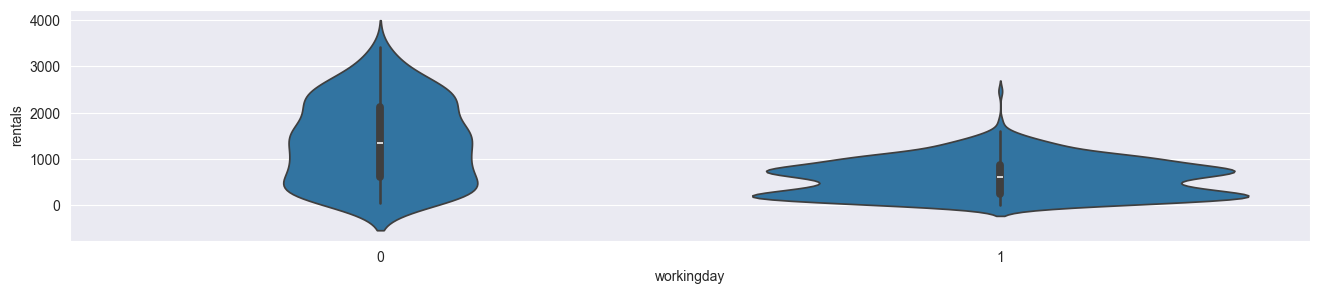

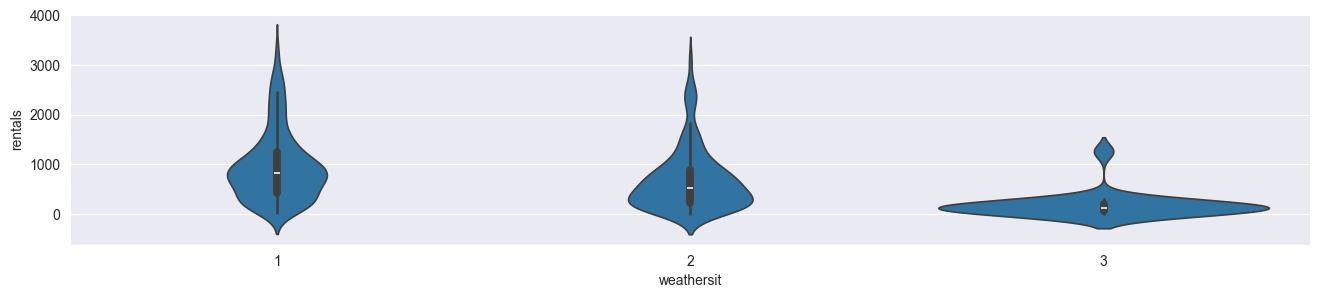

In [55]:
for category_feature in category_features:
    plt.figure(figsize=(16,3))
    sns.violinplot(y=bike_data[target], x=bike_data[category_feature])
    plt.show()